In [ ]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
# read Data
df_main_pca = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataPCA.csv')

##Visualization

### 1. Density plots of individual dimensions
---

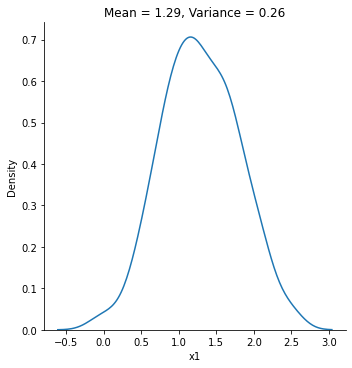

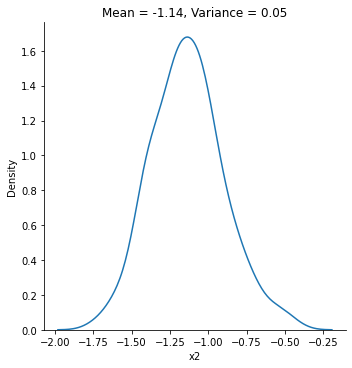

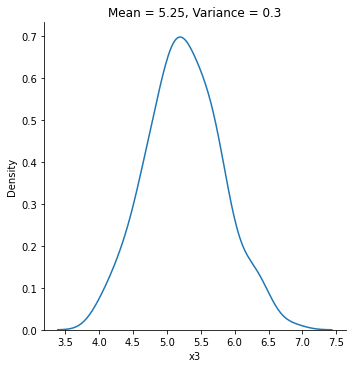

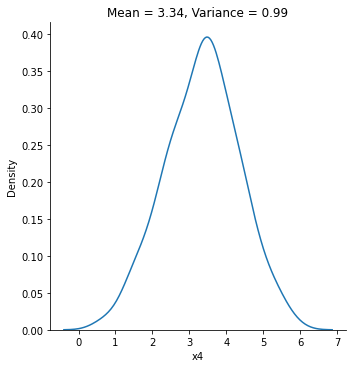

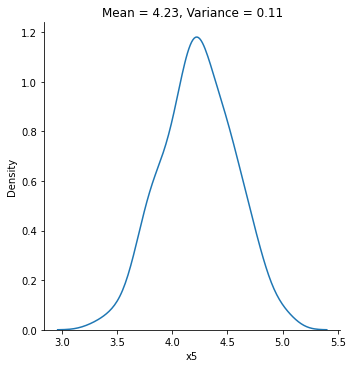

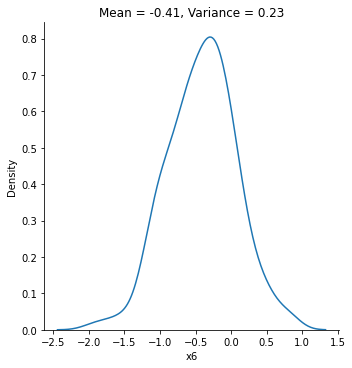

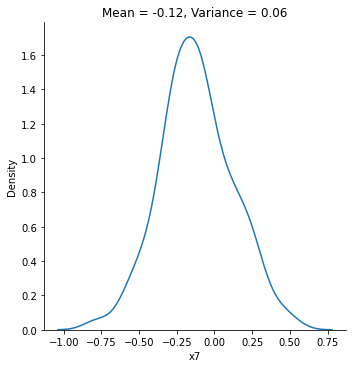

In [ ]:
for i in range(0, df_main_pca.shape[1]):
  df = df_main_pca.iloc[:, i]
  sns.displot(df, kind = 'kde')
  plt.title('Mean = {}, Variance = {}'.format(np.round(np.mean(df), 2) , np.round(np.var(df), 2)))
  plt.show()

**Observation** : Mean and Ranges of various dimensions are significantly different.

### 2. Some Pair-wise Scatter plots
---

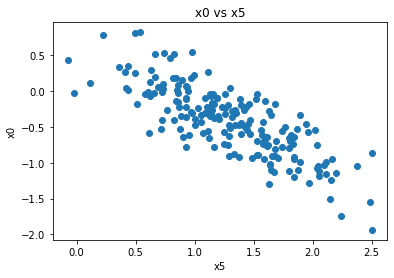

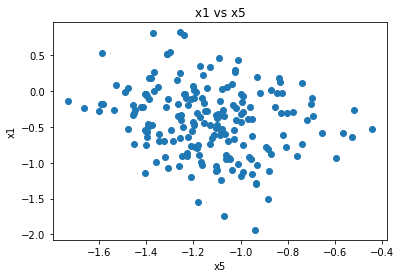

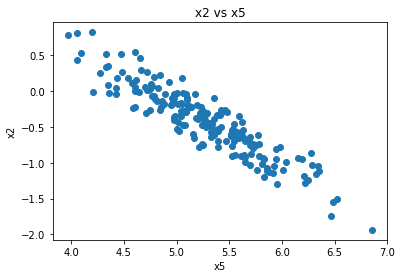

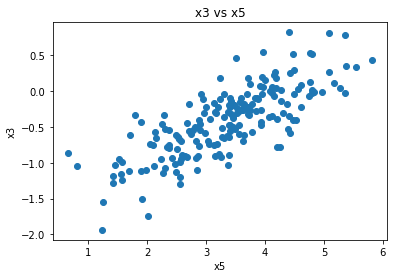

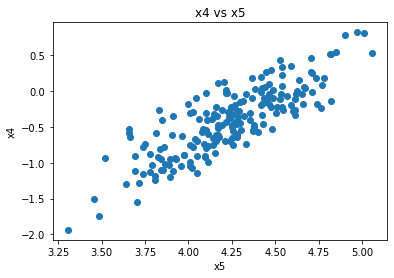

In [ ]:
for l in range(0, 5):
  plt.scatter(df_main_pca.iloc[:,l], df_main_pca.iloc[:,5])
  plt.title('x{} vs x5'.format(l))
  plt.xlabel('x5')
  plt.ylabel('x{}'.format(l))
  plt.show()

**Observation**: These pairwise scatter plots hint at the data points lying along a low dimensional linear manifold.

##Principal Component Analysis

###1. Data Centering
---


In [ ]:
# subtract dimension wise mean from the main data to center it around zero.
df_centered = df_main_pca - np.mean(df_main_pca)

In [ ]:
# converts the centered data to a 2d numpy array for feasibility in matrix calculations
Z = np.array(df_centered)

### 2. Covariance matrix calculation
---

In [ ]:
# using C = Z^T.Z/N
C = np.dot(np.transpose(Z), Z)/(Z.shape[0])

### 3. Eigen decomposition
---


Ref : https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html


In [ ]:
# eigh is used since C is a symmetric matrix, 
# eigh returns the eigen values and eigen vectors in the ascending order of the eigenvalues
eigenvals, eigenvecs = np.linalg.eigh(C)

# Define w and V  to represent eigen values and eigen vectors in descending order of eigenvalues
w, V = eigenvals[::-1], eigenvecs[:, ::-1]

In [ ]:
# define L as the diagonal matrix formed from the elements of w
L = np.diag(w)

Eigen decomposition of C : $C = VLV^{T}$ 

Now, the projection along the principal components, $Y = Z . V_{d}$, 

where 
  $V_{d} = V$ [ : , 0 : d+1] ,  and d is the desired number of dimensions.

### 4. Plotting Variance Explained (%) vs Principal components
---

In [ ]:
# each eigenvalue represents the variance along the corresponding eigenvector
var_explained = (100*w)/np.sum(w)

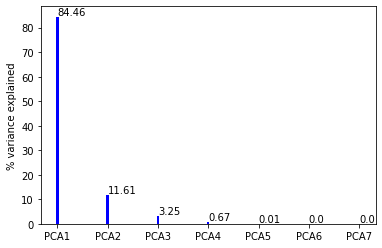

In [ ]:
# preparing the labels for x-axis in the plot
x = ['PCA{}'.format(i) for i in range(1, w.shape[0]+1)]

# make a bar plot
plt.bar(x, var_explained, width = 0.05, color = 'blue')

# annotate every bar with the corresponding height
for a,b in zip(x, np.round(var_explained,2)): 
    plt.annotate(str(b), xy=(a,b+0.75)) # first argument denote the value to annotate with, 
                                        # second argument denote the position of annotation

plt.ylabel('% variance explained')
plt.show()

**Obsevation** : There is sharp decreasing trend in the variance explained as we move to higher PCA dimensions. 
There is negligible contribution to variance explained by the last 4 principal components. 
The first two principal components together expain about 96% of the variance.

Ref for annotating the bars : https://stackoverflow.com/questions/6282058/writing-numerical-values-on-the-plot-with-matplotlib

### 5. Reconstruction MSE for various numbers of PCA dimensions
---

In [ ]:
# calculates MSE as Frobenius norm of Z-Zd
# for increasing no of PCA dimensions as
# only PCA1, PCA1 to PCA2, PCA1 to PCA3, and so on.
# array to store all the mse values in the order of increasing no. of pca dimensions
mse_arr = np.zeros(w.shape)
for i in range(1, w.shape[0]+1):
  # Vd is the eigen vector matrix containing first d eigen vectors
  Vd = V[:, 0:i]
  # Zd denotes the reconstructed data when Vd is used for transformation
  Zd = np.dot(np.dot(Z, Vd), np.transpose(Vd))
  # store the value of mse rounded upto 2 decimal places
  mse_arr[i-1] = np.round(((np.linalg.norm(Z-Zd))**2)/Z.shape[0], 2) # mse = ((Frobenius norm of matrix Z-Zd)^2)/N, N= no of data points

In [ ]:
# print the no of dimensions used and the corresponding mse in a table like format
# 'PCA1 to PACn' means all n dimensions from PCA1 to PCAn are used.
print('Dimensions    MSE\n')
print('PCA1         :  {}'.format(mse_arr[0]))
for k in range(1, mse_arr.shape[0]):
  print('PCA1 to PCA{}  :  {}'.format(k+1, mse_arr[k]))

Dimensions    MSE

PCA1         :  0.31
PCA1 to PCA2  :  0.08
PCA1 to PCA3  :  0.01
PCA1 to PCA4  :  0.0
PCA1 to PCA5  :  0.0
PCA1 to PCA6  :  0.0
PCA1 to PCA7  :  0.0


**Observation**: 

*   MSE progressively decreases as more no. of dimesnions are added to finally zero when all PCA dimesnsions are used.
*   Reconstruction MSE becomes negligible for PCA1 to PCA4. Even for PCA1 to PCA3 it's as low as 0.01


**Conclusion** : A good number of dimensions for dimension reduction using PCA is 3, i.e. PCA1, PCA2 and PCA3. These three capture most of the information in the original dimensions. 